In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: Adds additional language support for WordNet
nltk.download('stopwords')  # If stopwords are also not available
nltk.data.path.append('/kaggle/input/wordnet')  # Adjust the path accordingly to where you upload the data


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zshah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zshah\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zshah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv("C:/zshahpouri/data/iphone.csv")
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [3]:
df.shape

(3062, 11)

In [4]:
df.isnull().sum()

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

In [5]:
df['country'].value_counts()

country
India                   2229
United States            579
Japan                    158
United Arab Emirates      80
Mexico                    11
Canada                     4
Egypt                      1
Name: count, dtype: int64

In [6]:
df.groupby('country')['ratingScore'].mean()

country
Canada                  4.500000
Egypt                   5.000000
India                   3.810229
Japan                   3.310127
Mexico                  4.909091
United Arab Emirates    3.912500
United States           3.633851
Name: ratingScore, dtype: float64

<Axes: xlabel='ratingScore'>

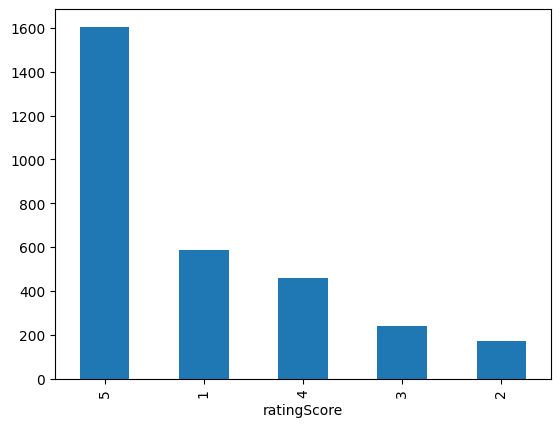

In [7]:
df['ratingScore'].value_counts().plot(kind='bar')

In [8]:
new_df = df.copy()
new_df = new_df[['reviewDescription', 'ratingScore']]

In [9]:
new_df.dropna(inplace=True)

In [10]:
new_df.shape

(2976, 2)

In [11]:
new_df['ratingScore'] = new_df['ratingScore'].apply(lambda x:'Bad' if x<= 3 else 'Good')

In [12]:
text = ' '.join(new_df['reviewDescription'])

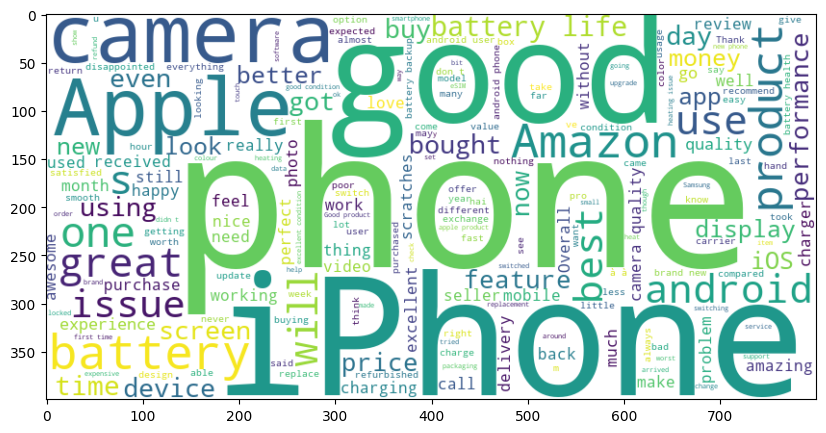

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')

In [14]:
lemma = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
 
stem = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))


In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Ensure you download the stopwords
import nltk
nltk.download('stopwords')

# Create stemmer object
stem = PorterStemmer()

# Preprocess function
def preprocess_text(review):
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', review)
    # Split the review into words
    review = review.split()
    # Remove stopwords (convert stopwords to a set for fast lookup)
    stop_words = set(stopwords.words('english'))
    review = [word for word in review if word.lower() not in stop_words]
    # Apply stemming
    review = [stem.stem(word) for word in review]
    return ' '.join(review)

# Apply the preprocessing function
new_df['cleaned_review'] = new_df['reviewDescription'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zshah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
le = LabelEncoder()
new_df['ratingScore'] = le.fit_transform(new_df['ratingScore'])

In [17]:
x = new_df['cleaned_review']
y = new_df['ratingScore']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [19]:
tfidf = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [20]:
classifiers = {'Random Forest': RandomForestClassifier(), 'Logistic Regression': LogisticRegression(),
              'Extra Tree': ExtraTreesClassifier()}

In [21]:
for name, clf in classifiers.items():
    pipeline = Pipeline([('classifier', clf)])
    pipeline.fit(x_train_tfidf, y_train)
    y_pred = pipeline.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy : {accuracy}")

Random Forest Accuracy : 0.8708053691275168
Logistic Regression Accuracy : 0.8489932885906041
Extra Tree Accuracy : 0.87751677852349


In [22]:
best_model_name = ""
best_accuracy = 0
best_pipeline = None

for name, clf in classifiers.items():
    pipeline = Pipeline([('classifier', clf)])
    pipeline.fit(x_train_tfidf, y_train)
    y_pred = pipeline.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy : {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_pipeline = pipeline
        
print(f"\n best model is {best_model_name} with accuracy {best_accuracy:.4f}")
y_pred_best = best_pipeline.predict(x_test_tfidf)
final_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\n Final Accuary of best model {best_model_name}: {final_accuracy:.4f}")

Random Forest Accuracy : 0.8809
Logistic Regression Accuracy : 0.8490
Extra Tree Accuracy : 0.8658

 best model is Random Forest with accuracy 0.8809

 Final Accuary of best model Random Forest: 0.8809
